In [37]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [38]:
#import pandas
import pandas as pd
#import pyplot from matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
#import regex
import re

In [39]:
#create a list containing the formula of elements that are of interest
elementsOfInterest=['Al','Ca','Fe','Mg','O','Si','Ti','K','Th','U']

In [40]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-421+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [41]:
#set the address of the Capture IAEA file
iaeaFileAddress="C:/ML4Sci/NASA-gamma/nasagamma/data/Capture_IAEA.csv"

In [42]:
#read the csv file as a dataframe
captureIAEADataframe=pd.read_csv(iaeaFileAddress)

In [43]:
#show the read dataframe
captureIAEADataframe

,Isotope,Energy (keV),Sigma (mb),DSigma (mb)
0,1H,2223.248,3.330000e+02,7.000000e-01
1,2H,6250.243,5.190000e-01,7.000000e-03
2,3He,20520.460,4.200000e-08,1.200000e-08
3,6Li,7245.910,2.470000e+00,1.400000e-01
4,6Li,477.595,1.530000e+00,8.000000e-02
...,...,...,...,...
31611,238U,3743.920,1.400000e-01,6.000000e-02
31612,238U,4071.750,1.400000e-01,4.000000e-02
31613,238U,3913.100,8.000000e-02,4.000000e-02
31614,238U,4806.380,7.000000e-02,7.000000e-02


In [44]:
#retain rows for only the elements of interest
captureIAEADataframe=captureIAEADataframe[captureIAEADataframe['Isotope'].str.endswith(tuple(elementsOfInterest))]

In [45]:
#remove any rows that are outside the relavent energy range
captureIAEADataframe=captureIAEADataframe[captureIAEADataframe["Energy (keV)"].between(relaventEnergyBands[0],relaventEnergyBands[-1])]

In [46]:
#add a column Type and set it to Capture_IAEA
captureIAEADataframe["Type"]="Capture_IAEA"

In [47]:
#show the processed dataframe
captureIAEADataframe

,Isotope,Energy (keV),Sigma (mb),DSigma (mb),Type
105,16O,870.68,0.1770,0.01100,Capture_IAEA
106,16O,2184.42,0.1640,0.00700,Capture_IAEA
107,16O,1087.75,0.1580,0.00700,Capture_IAEA
108,16O,3272.02,0.0353,0.00230,Capture_IAEA
109,17O,1981.95,0.0002,0.00004,Capture_IAEA
...,...,...,...,...,...
31611,238U,3743.92,0.1400,0.06000,Capture_IAEA
31612,238U,4071.75,0.1400,0.04000,Capture_IAEA
31613,238U,3913.10,0.0800,0.04000,Capture_IAEA
31614,238U,4806.38,0.0700,0.07000,Capture_IAEA


In [48]:
#set the address for the Inelastic_Baghdad file
InelasticBaghdadFileAddress="C:/ML4Sci/NASA-gamma/nasagamma/data/Inelastic_Baghdad.csv"

In [49]:
#read the .csv file into a dataframe
inelasticBaghdadDataframe=pd.read_csv(InelasticBaghdadFileAddress)

In [50]:
#show the read dataframe
inelasticBaghdadDataframe

,Isotope,Energy (keV),XS (mb),Compound
0,00Li,478.40,248.040,7Li
1,00B,477.70,61.308,7Li
2,00B,2124.00,5.850,11B
3,00B,718.18,2.223,10B
4,00B,4442.20,2.223,11B
...,...,...,...,...
7371,00U,1113.60,2.986,238U
7372,00U,1263.60,2.714,238U
7373,00U,1103.60,2.172,238U
7374,00U,1524.50,2.172,238U


In [51]:
#retain rows for only the elements of interest
inelasticBaghdadDataframe=inelasticBaghdadDataframe[inelasticBaghdadDataframe['Isotope'].str.endswith(tuple(elementsOfInterest))]

In [52]:
#remove any rows that are outside the relavent energy range
inelasticBaghdadDataframe=inelasticBaghdadDataframe[inelasticBaghdadDataframe["Energy (keV)"].between(relaventEnergyBands[0],relaventEnergyBands[-1])]

In [53]:
#add a column Type and set it to Inelastic_Talys
inelasticBaghdadDataframe["Type"]="Inelastic_Baghdad"

In [54]:
#show the processed dataframe
inelasticBaghdadDataframe

,Isotope,Energy (keV),XS (mb),Compound,Type
19,00O,6129.30,3.063,16O,Inelastic_Baghdad
20,00O,1983.00,0.515,18O,Inelastic_Baghdad
58,00Mg,1368.53,131.040,24Mg,Inelastic_Baghdad
59,00Mg,584.90,19.656,25Mg,Inelastic_Baghdad
60,00Mg,1808.60,14.414,26Mg,Inelastic_Baghdad
...,...,...,...,...,...
7371,00U,1113.60,2.986,238U,Inelastic_Baghdad
7372,00U,1263.60,2.714,238U,Inelastic_Baghdad
7373,00U,1103.60,2.172,238U,Inelastic_Baghdad
7374,00U,1524.50,2.172,238U,Inelastic_Baghdad


In [55]:
#set the address for the Natural_Radiation file
naturalRadiationFileAddress="C:/ML4Sci/NASA-gamma/nasagamma/data/Natural_radiation.csv"

In [56]:
#read the .csv file into a dataframe
naturalRadiationDataframe=pd.read_csv(naturalRadiationFileAddress)

In [57]:
#show the read dataframe
naturalRadiationDataframe

,Isotope,Energy (keV),Intensity (%),Info
0,40K,1460.820,10.660,Nat-40K
1,208Tl,722.040,0.201,Nat-232Th
2,208Tl,2614.533,99.000,Nat-232Th
3,208Tl,510.770,22.600,Nat-232Th
4,208Tl,860.564,12.420,Nat-232Th
...,...,...,...,...
133,235U,185.712,57.200,Nat-235U
134,235U,279.500,0.270,Nat-235U
135,235U,221.399,0.120,Nat-235U
136,235U,194.940,0.630,Nat-235U


In [58]:
#retain rows for only the elements of interest
naturalRadiationDataframe=naturalRadiationDataframe[naturalRadiationDataframe['Info'].str.endswith(tuple(elementsOfInterest))]

In [59]:
#remove any rows that are outside the relavent energy range
naturalRadiationDataframe=naturalRadiationDataframe[naturalRadiationDataframe["Energy (keV)"].between(relaventEnergyBands[0],relaventEnergyBands[-1])]

In [60]:
#add a column Type and set it to Inelastic_Talys
naturalRadiationDataframe["Type"]="Natural_radiation"

In [61]:
#replace isotope by info
naturalRadiationDataframe["Isotope"]=naturalRadiationDataframe["Info"]

In [62]:
#show the processed dataframe
naturalRadiationDataframe

,Isotope,Energy (keV),Intensity (%),Info,Type
0,Nat-40K,1460.820,10.660,Nat-40K,Natural_radiation
1,Nat-232Th,722.040,0.201,Nat-232Th,Natural_radiation
2,Nat-232Th,2614.533,99.000,Nat-232Th,Natural_radiation
4,Nat-232Th,860.564,12.420,Nat-232Th,Natural_radiation
7,Nat-232Th,1093.900,0.400,Nat-232Th,Natural_radiation
...,...,...,...,...,...
114,Nat-232Th,840.377,0.910,Nat-232Th,Natural_radiation
115,Nat-232Th,1495.930,0.860,Nat-232Th,Natural_radiation
116,Nat-232Th,1459.138,0.830,Nat-232Th,Natural_radiation
125,Nat-238U,766.380,0.294,Nat-238U,Natural_radiation


In [63]:
#show all three processed dataframes

In [64]:
#show the processed dataframe
captureIAEADataframe

,Isotope,Energy (keV),Sigma (mb),DSigma (mb),Type
105,16O,870.68,0.1770,0.01100,Capture_IAEA
106,16O,2184.42,0.1640,0.00700,Capture_IAEA
107,16O,1087.75,0.1580,0.00700,Capture_IAEA
108,16O,3272.02,0.0353,0.00230,Capture_IAEA
109,17O,1981.95,0.0002,0.00004,Capture_IAEA
...,...,...,...,...,...
31611,238U,3743.92,0.1400,0.06000,Capture_IAEA
31612,238U,4071.75,0.1400,0.04000,Capture_IAEA
31613,238U,3913.10,0.0800,0.04000,Capture_IAEA
31614,238U,4806.38,0.0700,0.07000,Capture_IAEA


In [65]:
#show the processed dataframe
inelasticBaghdadDataframe

,Isotope,Energy (keV),XS (mb),Compound,Type
19,00O,6129.30,3.063,16O,Inelastic_Baghdad
20,00O,1983.00,0.515,18O,Inelastic_Baghdad
58,00Mg,1368.53,131.040,24Mg,Inelastic_Baghdad
59,00Mg,584.90,19.656,25Mg,Inelastic_Baghdad
60,00Mg,1808.60,14.414,26Mg,Inelastic_Baghdad
...,...,...,...,...,...
7371,00U,1113.60,2.986,238U,Inelastic_Baghdad
7372,00U,1263.60,2.714,238U,Inelastic_Baghdad
7373,00U,1103.60,2.172,238U,Inelastic_Baghdad
7374,00U,1524.50,2.172,238U,Inelastic_Baghdad


In [66]:
#show the processed dataframe
naturalRadiationDataframe

,Isotope,Energy (keV),Intensity (%),Info,Type
0,Nat-40K,1460.820,10.660,Nat-40K,Natural_radiation
1,Nat-232Th,722.040,0.201,Nat-232Th,Natural_radiation
2,Nat-232Th,2614.533,99.000,Nat-232Th,Natural_radiation
4,Nat-232Th,860.564,12.420,Nat-232Th,Natural_radiation
7,Nat-232Th,1093.900,0.400,Nat-232Th,Natural_radiation
...,...,...,...,...,...
114,Nat-232Th,840.377,0.910,Nat-232Th,Natural_radiation
115,Nat-232Th,1495.930,0.860,Nat-232Th,Natural_radiation
116,Nat-232Th,1459.138,0.830,Nat-232Th,Natural_radiation
125,Nat-238U,766.380,0.294,Nat-238U,Natural_radiation


In [67]:
#concatenate the three dataframes together
allLinesDataset=pd.concat([captureIAEADataframe,
                           inelasticBaghdadDataframe,
                           naturalRadiationDataframe])

In [68]:
#show the concattenated dataset
allLinesDataset

,Isotope,Energy (keV),Sigma (mb),DSigma (mb),Type,XS (mb),Compound,Intensity (%),Info
105,16O,870.680,0.1770,0.01100,Capture_IAEA,NaN,NaN,NaN,NaN
106,16O,2184.420,0.1640,0.00700,Capture_IAEA,NaN,NaN,NaN,NaN
107,16O,1087.750,0.1580,0.00700,Capture_IAEA,NaN,NaN,NaN,NaN
108,16O,3272.020,0.0353,0.00230,Capture_IAEA,NaN,NaN,NaN,NaN
109,17O,1981.950,0.0002,0.00004,Capture_IAEA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,Nat-232Th,840.377,NaN,NaN,Natural_radiation,NaN,NaN,0.910,Nat-232Th
115,Nat-232Th,1495.930,NaN,NaN,Natural_radiation,NaN,NaN,0.860,Nat-232Th
116,Nat-232Th,1459.138,NaN,NaN,Natural_radiation,NaN,NaN,0.830,Nat-232Th
125,Nat-238U,766.380,NaN,NaN,Natural_radiation,NaN,NaN,0.294,Nat-238U


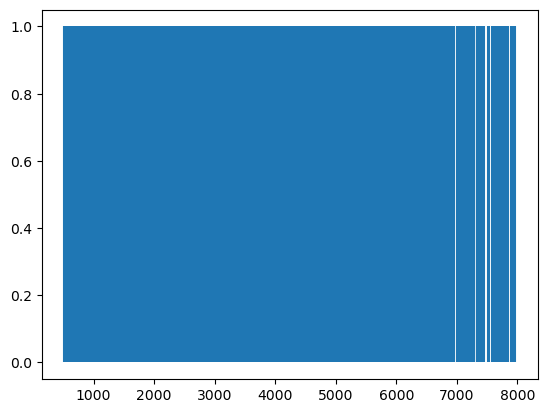

In [70]:
plt.vlines(x=allLinesDataset['Energy (keV)'],ymin=0,ymax=1)